# Longitudes y distancias

## Explicación Matemática

### Distancias

Las **métricas de distancia** permiten cuantificar la separación entre dos puntos en un espacio. A continuación, se presentan las principales:

#### Distancia Euclidiana (L2)

La distancia euclidiana mide la longitud de la línea recta entre dos puntos. Para dos puntos 
$A = (x_1, x_2, \dots, x_n)$ y 
$B = (y_1, y_2, \dots, y_n)$ se define como:

$$
d_{\text{Euclid}}(A,B) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2 }
$$

Esta métrica corresponde a la norma L2 del vector diferencia $A-B$.

#### Distancia de Manhattan (L1)

La distancia de Manhattan, también conocida como distancia "taxicab", se basa en la suma de las diferencias absolutas de las coordenadas:

$$
d_{\text{Manhattan}}(A,B) = \sum_{i=1}^{n} \left| x_i - y_i \right|
$$

Es útil en entornos en los que el movimiento se restringe a ejes ortogonales.

#### Distancia de Minkowski (Lp)

La distancia de Minkowski es una generalización de las anteriores a través del parámetro $p$:

$$
d_{\text{Minkowski},p}(A,B) = \left(\sum_{i=1}^{n} \left| x_i - y_i \right|^p \right)^{\frac{1}{p}}
$$

Para $p = 1$ se obtiene la Manhattan y para $p = 2$ la Euclidiana. En el límite cuando $p \to \infty$, se obtiene la **distancia de Chebyshev**:

$$
d_{\infty}(A,B) = \max_{i} \left| x_i - y_i \right|
$$

#### Otras Métricas

- **Distancia Coseno:**  
  Basada en el ángulo entre dos vectores, se define a partir de la similitud coseno:

$$
\text{similitud\_cos}(A,B) = \frac{A \cdot B}{\|A\|\;\|B\|}, \quad d_{\cos}(A,B) = 1 - \text{similitud\_cos}(A,B)
$$

- **Distancia de Hamming:**  
  Para secuencias o vectores discretos, cuenta el número de posiciones en que difieren:

$$
d_{\text{Hamming}}(s,t) = \#\{ i \,|\, s_i \neq t_i \}
$$

- **Distancia de Jaccard:**  
  Mide la disimilitud entre conjuntos:

$$
d_{\text{Jaccard}}(A,B) = 1 - \frac{|A \cap B|}{|A \cup B|}
$$

- **Distancia de Mahalanobis:**  
  Considera la estructura de covarianza de los datos:

$$
d_{\text{Mahalanobis}}(x,y) = \sqrt{(x-y)^T \Sigma^{-1} (x-y)}
$$

### Longitudes

El concepto de **longitud** en geometría se refiere a la medida de la extensión a lo largo de una dimensión.

#### Longitud de un segmento

Para un segmento de línea recta, la longitud es la distancia euclidiana entre sus dos extremos:

$$
L = d_{\text{Euclid}}(A,B)
$$

#### Longitud de una curva

Para una curva parametrizada 
$\gamma : [a, b] \to \mathbb{R}^n$, la longitud (o longitud de arco) se define mediante la integral:

$$
L(\gamma) = \int_a^b \|\gamma'(t)\|\, dt
$$

donde $\gamma'(t)$ es la derivada de la función parametrizada y $\|\gamma'(t)\$ su norma.

---



## Aplicaciones en Ciencias de Datos

Las métricas de distancia y el cálculo de longitudes tienen un amplio espectro de aplicaciones en ciencia de datos, desde técnicas de clasificación y clustering hasta análisis de trayectorias, procesamiento de imágenes y detección de anomalías. A continuación se detallan diversas aplicaciones junto con ejemplos y fragmentos de código en Python.

### 1. Clasificación y Clustering

#### Clasificación con k-Nearest Neighbors (k-NN)

En el algoritmo **k-NN** se utiliza una métrica de distancia para identificar los vecinos más cercanos a un nuevo punto y asignar la clase predominante. Dependiendo de la naturaleza de los datos, se pueden usar la distancia Euclidiana, Manhattan o incluso la de Minkowski.


In [9]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Cargamos el conjunto de datos Iris
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Usamos k-NN con la distancia Euclidiana (Minkowski p=2)
knn_euclid = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_euclid.fit(X_train, y_train)
print("Precisión con distancia Euclidiana:", knn_euclid.score(X_test, y_test))

# Usamos k-NN con la distancia Manhattan (Minkowski p=1)
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=1)
knn_manhattan.fit(X_train, y_train)
print("Precisión con distancia Manhattan:", knn_manhattan.score(X_test, y_test))


Precisión con distancia Euclidiana: 1.0
Precisión con distancia Manhattan: 1.0



#### Clustering con k-Means

El algoritmo **k-Means** busca agrupar puntos minimizando la suma de las distancias euclidianas entre cada punto y el centroide de su clúster.

*Ejemplo:*


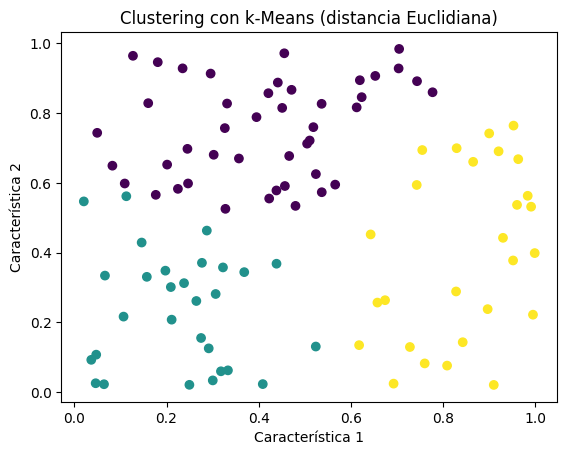

In [10]:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Supongamos un conjunto de datos bidimensional
X = np.random.rand(100, 2)

# Aplicamos k-Means para 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
plt.title("Clustering con k-Means (distancia Euclidiana)")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.show()



### 2. Regresión

#### Regresión Lineal (Error Cuadrático)

La **regresión lineal** se entrena minimizando la suma de errores al cuadrado, lo cual es equivalente a minimizar la distancia Euclidiana entre los valores predichos y reales.

*Ejemplo:*


In [11]:

from sklearn.linear_model import LinearRegression
import numpy as np

# Datos de ejemplo
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 5, 4, 5])

# Ajustamos un modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Cálculo del error cuadrático medio (MSE)
mse = np.mean((y - y_pred) ** 2)
print("Error cuadrático medio:", mse)


Error cuadrático medio: 0.47999999999999987




#### Regresión LAD y Regularización L1 (Lasso)

La **regresión LAD (Least Absolute Deviations)** minimiza la suma de errores absolutos (distancia L1) y es más robusta frente a outliers. De manera similar, la regularización L1 (Lasso) penaliza la suma de los valores absolutos de los coeficientes para obtener modelos más parsimoniosos.

*Ejemplo con Lasso:*


In [12]:

from sklearn.linear_model import Lasso

# Ajustamos un modelo Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)
print("Coeficientes del modelo Lasso:", lasso.coef_)

Coeficientes del modelo Lasso: [0.55]



### 3. Análisis de Trayectorias y Series Temporales

El cálculo de la **longitud de una curva** es fundamental en el análisis de trayectorias, ya que permite cuantificar la "distancia recorrida" a lo largo de una trayectoria.

*Ejemplo:* Calcular la longitud de la curva definida por 
$y = \sin(x)$ en el intervalo $[0, \pi]$:


In [13]:
import numpy as np
from scipy.integrate import quad

def integrand(x):
    return np.sqrt(1 + np.cos(x)**2)

longitud, error = quad(integrand, 0, np.pi)
print(f"Longitud de la curva y = sin(x) en [0, π]: {longitud:.4f}")



Longitud de la curva y = sin(x) en [0, π]: 3.8202



---

## Resumen

Las diversas métricas de distancia (Euclidiana, Manhattan, Minkowski, Coseno, Hamming, Jaccard y Mahalanobis) permiten modelar la "cercanía" entre puntos, secuencias o conjuntos en espacios de datos de distintas naturalezas. Asimismo, el cálculo de longitudes (ya sea de segmentos rectos o de curvas) es fundamental para analizar trayectorias, contornos y formas.

Estas herramientas matemáticas se traducen en aplicaciones prácticas en clasificación, clustering, regresión, análisis de trayectorias, procesamiento de imágenes, análisis geoespacial, sistemas de recomendación y detección de anomalías, entre otros. La implementación de estos métodos en Python, utilizando bibliotecas como **scikit-learn**, **SciPy**, **NumPy** y **OpenCV**, permite adaptar y experimentar con técnicas para mejorar la eficiencia y precisión de los modelos en proyectos de ciencia de datos.

---


---
### Referencias

1. **Bishop, C. M. (2006).** *Pattern Recognition and Machine Learning.* Springer.  
   Referencia clásica para conceptos de aprendizaje, clasificación y métricas en espacios de características.

2. **Hastie, T., Tibshirani, R., & Friedman, J. (2009).** *The Elements of Statistical Learning: Data Mining, Inference, and Prediction.* Springer.  
   Fuente fundamental sobre técnicas de regresión, clustering y métodos estadísticos en ciencia de datos.

3. **Han, J., Kamber, M., & Pei, J. (2011).** *Data Mining: Concepts and Techniques.* Elsevier.  
   Texto que abarca métodos y aplicaciones en minería de datos, incluyendo el uso de distintas métricas de distancia.

4. **SciPy Documentation.** Recuperado de [https://docs.scipy.org/doc/scipy/reference/](https://docs.scipy.org/doc/scipy/reference/)  
   Documentación oficial de SciPy, útil para implementar integrales numéricas y métodos de optimización.

5. **NumPy Documentation.** Recuperado de [https://numpy.org/doc/](https://numpy.org/doc/)  
   Fuente oficial para operaciones numéricas y manejo de arrays, esencial para cálculos vectoriales.

6. **scikit-learn Documentation.** Recuperado de [https://scikit-learn.org/stable/](https://scikit-learn.org/stable/)  
   Documentación sobre algoritmos de clasificación, clustering, regresión y validación de modelos.

7. **OpenCV Documentation.** Recuperado de [https://docs.opencv.org/](https://docs.opencv.org/)  
   Referencia para el procesamiento de imágenes, extracción de contornos y análisis de formas.

8. **Wikipedia – Distance (mathematics).** Recuperado de [https://en.wikipedia.org/wiki/Distance_(mathematics)](https://en.wikipedia.org/wiki/Distance_(mathematics))  
   Artículo que abarca definiciones y propiedades de diversas métricas de distancia en geometría.

---
